In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

In [2]:
#See all columns of dataframes

pd.set_option('display.max_columns', None)

In [3]:
#Import dataframes we will use after

df= pd.read_excel('NAVCO 1.2 Updated.xlsx')
polity_df=pd.read_excel('p5v2018.xls')

First, I investigate the data from the first dataframe with some basic prints to get an overview. I will check
* A sample of some rows from data frame
* The shape
* Descriptive Statistics

In [4]:
df.head()

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,0,1,1,0,0,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,0,1,0,1,0,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,0,1,1,0,0,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,0,1,1,0,0,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,1,0,1,0,0,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0


In [5]:
df.describe()

,NAVCO ID,BYEAR,EYEAR,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.800000e+02,389.000000,389.000000,389.000000,177.000000,388.000000,389.000000,389.000000
mean,208.239075,1983.218509,1988.946015,0.385604,0.113111,0.501285,0.095116,0.434447,0.565553,0.691517,0.133676,0.154242,0.020566,2142.172237,1.692959e+05,0.010449,0.904884,0.272494,0.327684,0.389175,0.339332,0.269923
std,120.296999,19.447552,19.702678,0.487365,0.317136,0.500642,0.293752,0.496323,0.496323,0.462462,0.340742,0.361645,0.142107,3269.967566,8.904774e+05,0.039073,0.293752,0.445816,0.470700,0.488193,0.474092,0.444491
min,1.000000,1945.000000,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,1968.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,4.725000e+03,0.000249,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207.000000,1987.000000,1991.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,925.000000,1.500000e+04,0.001183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,309.000000,1999.000000,2006.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2522.000000,7.075000e+04,0.005183,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,435.000000,2013.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22875.000000,1.400000e+07,0.450129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(389, 25)

# 1. Exploration of Historical Trends

In each of the following plots, I will choose the matplotlib style that fits the desired plot, based on the prorotype. So first, I need to do some research on https://matplotlib.org/  to choose the most t appropriate one.Below, I also see all the available styles

In [7]:
print(plt.style.available) # available styles for plots

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Before starting to create the plots, I will choose the colours according to the needs of the graph. After the research, I will choose the colours from "Set1" and so I will print all the available codes to use them later.

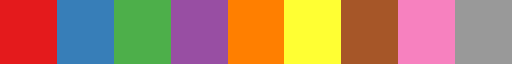

In [8]:
cmap = plt.get_cmap('Set1')
cmap

## Plot1

I will create a plot showing the frequency of nonviolent and violent campaigns.
First, I need to create a function that converts the end date to a decade.

In [9]:
#Function that converts year to decade
def find_decade(year):
    decade = (year // 10) * 10
    return decade

In [10]:
# Apply this function to dataframe

df['EYEAR_DECADE']=df.EYEAR.apply(find_decade)

In [11]:
#Create a table with  violent and non violent campaigns per decade

violence_per_dec=df[['EYEAR_DECADE','VIOL','NONVIOL']].groupby(by='EYEAR_DECADE').sum().reset_index().sort_values(by='EYEAR_DECADE')
violence_per_dec

,EYEAR_DECADE,VIOL,NONVIOL
0,1940,12,2
1,1950,25,9
2,1960,21,8
3,1970,27,13
4,1980,17,30
5,1990,54,36
6,2000,23,37
7,2010,41,34


I will proceed to the plot by selecting seaborn-v0_8-whitegrid style

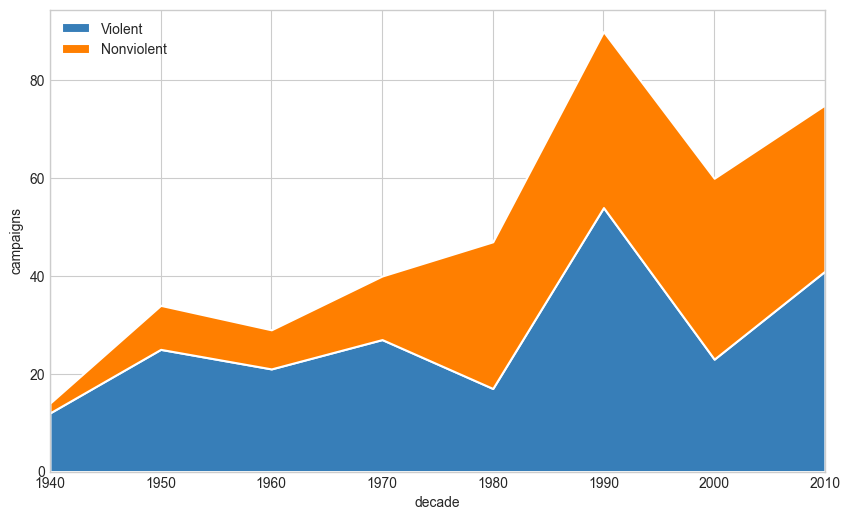

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

plt.stackplot(violence_per_dec['EYEAR_DECADE'],violence_per_dec['VIOL'],violence_per_dec['NONVIOL']
              ,labels=['Violent','Nonviolent']
              ,colors=[cmap(1),cmap(4)]
              ,lw=1.5, edgecolor='white') 



plt.xlabel('decade')
plt.ylabel('campaigns')

plt.xlim([1940, 2010])




_ = plt.legend(loc='upper left')



## Plot 2

I will create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success.


I create a table with the number of non violent campaigns per decade and the respectve number of successful non violent campaigns.
Having calculated these 2 values, I also calculate the percentage of success by dividing them.

In [13]:
non_violent=df[df['VIOL']==0][['EYEAR_DECADE','SUCCESS']].groupby('EYEAR_DECADE')['SUCCESS'].aggregate(['count','sum']).reset_index().sort_values(by='EYEAR_DECADE')
non_violent.rename(columns={"count": "total_non_violent", "sum": "successful_non_violent"},inplace=True)
non_violent

,EYEAR_DECADE,total_non_violent,successful_non_violent
0,1940,2,1
1,1950,9,2
2,1960,8,2
3,1970,13,7
4,1980,30,14
5,1990,36,30
6,2000,37,25
7,2010,34,13


In [14]:
#Calculate the percentage
non_violent['percentage']=non_violent['successful_non_violent']/non_violent['total_non_violent']

In [15]:
# The table I need for the plot
non_violent

,EYEAR_DECADE,total_non_violent,successful_non_violent,percentage
0,1940,2,1,0.500000
1,1950,9,2,0.222222
2,1960,8,2,0.250000
3,1970,13,7,0.538462
4,1980,30,14,0.466667
5,1990,36,30,0.833333
6,2000,37,25,0.675676
7,2010,34,13,0.382353


Before I create the plot, I have to find the colors that I will use in the graph. After research, I decide to get specific colors and the respective codes from matplotlib. More specifically '#377eb8' as blue and '#FFA500' as orange.I also add space between the bars.

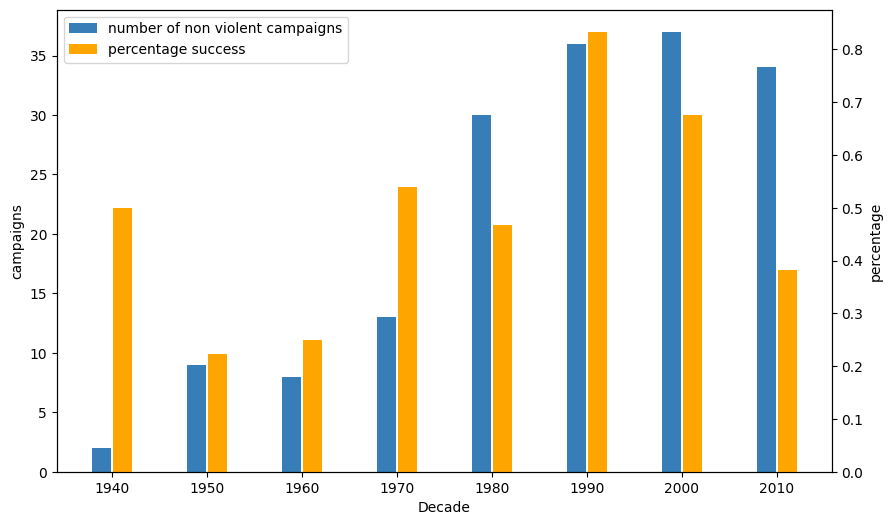

In [16]:
plt.style.use('default')


#Create 2 plots but in the second we adjust the yaxis with twinx().



fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first set of bars
ax.bar(non_violent['EYEAR_DECADE'] - 1.1, non_violent['total_non_violent'], width=2, label='number of non violent campaigns',color=cmap(1)) # Blue bars




# Create a second y-axis for the "Percentage" data
ax2 = ax.twinx()
ax2.bar(non_violent['EYEAR_DECADE'] + 1.1, non_violent['percentage'], width=2, label='percentage success',color='#FFA500')# Orange bars         

# Adjust the y-axis label for the second y-axis
ax2.set_ylabel('percentage')

ax.set_xlabel('Decade')
ax.set_ylabel('campaigns')

# Combine the legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')


plt.show()

## Plot 3

I want to create a plot showing the success rate for violent and nonviolent campaigns by decade.
I create to tables violent_success and nonviolent_success, showing the number of campaigns and the percentage fo success per decade for violent
and non violent campaigns respectively.

In [17]:
violent_success=df[df['VIOL']==1][['EYEAR_DECADE','SUCCESS']].groupby('EYEAR_DECADE')['SUCCESS'].aggregate(['count','sum']).reset_index().sort_values(by='EYEAR_DECADE')
violent_success['VIOLENT_PERCENTAGE']=violent_success['sum']/violent_success['count']
violent_success

,EYEAR_DECADE,count,sum,VIOLENT_PERCENTAGE
0,1940,12,6,0.500000
1,1950,25,8,0.320000
2,1960,21,4,0.190476
3,1970,27,12,0.444444
4,1980,17,5,0.294118
5,1990,54,15,0.277778
6,2000,23,3,0.130435
7,2010,41,3,0.073171


In [18]:
nonviolent_success=df[df['NONVIOL']==1][['EYEAR_DECADE','SUCCESS']].groupby('EYEAR_DECADE')['SUCCESS'].aggregate(['count','sum']).reset_index().sort_values(by='EYEAR_DECADE')
nonviolent_success['NONVIOLENT_PERCENTAGE']=nonviolent_success['sum']/nonviolent_success['count']
nonviolent_success

,EYEAR_DECADE,count,sum,NONVIOLENT_PERCENTAGE
0,1940,2,1,0.500000
1,1950,9,2,0.222222
2,1960,8,2,0.250000
3,1970,13,7,0.538462
4,1980,30,14,0.466667
5,1990,36,30,0.833333
6,2000,37,25,0.675676
7,2010,34,13,0.382353


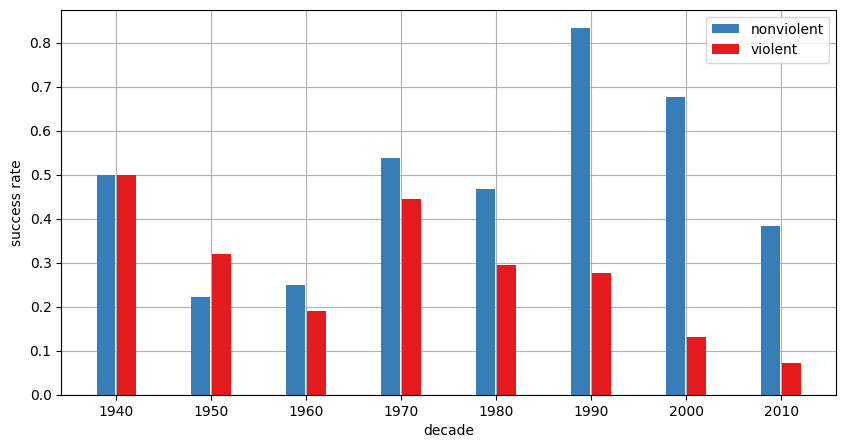

In [19]:
plt.style.use('default')

fig = plt.figure(figsize = (10, 5))

plt.grid(zorder=1)


# creating the bar plot
plt.bar(nonviolent_success['EYEAR_DECADE'] - 1.1, nonviolent_success['NONVIOLENT_PERCENTAGE'], color=cmap(1), 
        width =2 , label='nonviolent',zorder=2)

plt.bar(violent_success['EYEAR_DECADE'] + 1.1, violent_success['VIOLENT_PERCENTAGE'], color=cmap(0), 
        width =2 , label='violent',zorder=2)

plt.xlabel('decade')
plt.ylabel('success rate')


_=plt.legend()

From the above graph is obvious that nonviolent campaigns have higher success probabilities.

# 2. Largest Resistance Campaigns, 1946-2014

First, I create a new column with the results of each campaign, that will be used as labels for the graph.

In [20]:
camp_conditions = [
    (df['SUCCESS'] == 1),
    (df['LIMITED'] == 1),
    (df['FAILURE'] == 1)]

camp_res = ['Campaign succeeded', 'Campaign achieved major concessions short of full success', 'Campaign failed']

df['CAMPAIGN_RESULTS'] = np.select(camp_conditions, camp_res)
df.head()

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,EYEAR_DECADE,CAMPAIGN_RESULTS
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,0,1,1,0,0,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1,1970,Campaign succeeded
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,0,1,0,1,0,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1,1980,Campaign succeeded
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,0,1,1,0,0,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0,1990,Campaign succeeded
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,0,1,1,0,0,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0,2010,Campaign failed
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,1,0,1,0,0,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0,1990,Campaign succeeded


Then I add a new column with the description and the location where the campaign took place.

In [21]:
df['DESCRIPTION']=df['LOCATION'] + ': ' + df['TARGET']

Finally, I keep in a new table only the campaigns with a percentage of participation at least 2.0%, which i will use it for the graph.

In [22]:
campaigns_over_002=df[df['PERCENTAGE POPULAR PARTICIPATION']>0.02][['DESCRIPTION','LOCATION','TARGET','SUCCESS','LIMITED','FAILURE','CAMPAIGN_RESULTS','PERCENTAGE POPULAR PARTICIPATION']]
campaigns_over_002.sort_values(by=['PERCENTAGE POPULAR PARTICIPATION'],ascending=True,inplace=True)
campaigns_over_002.head()

,DESCRIPTION,LOCATION,TARGET,SUCCESS,LIMITED,FAILURE,CAMPAIGN_RESULTS,PERCENTAGE POPULAR PARTICIPATION
132,Hungary: communist regime,Hungary,communist regime,0,0,1,Campaign failed,0.020264
89,East Germany: Communist regime,East Germany,Communist regime,0,0,1,Campaign failed,0.022005
352,Ukraine: President Yanukovych,Ukraine,President Yanukovych,1,0,0,Campaign succeeded,0.022089
304,South Korea: Mil govt,South Korea,Mil govt,1,0,0,Campaign succeeded,0.023981
292,Serbia: Milosevic regime,Serbia,Milosevic regime,1,0,0,Campaign succeeded,0.026609


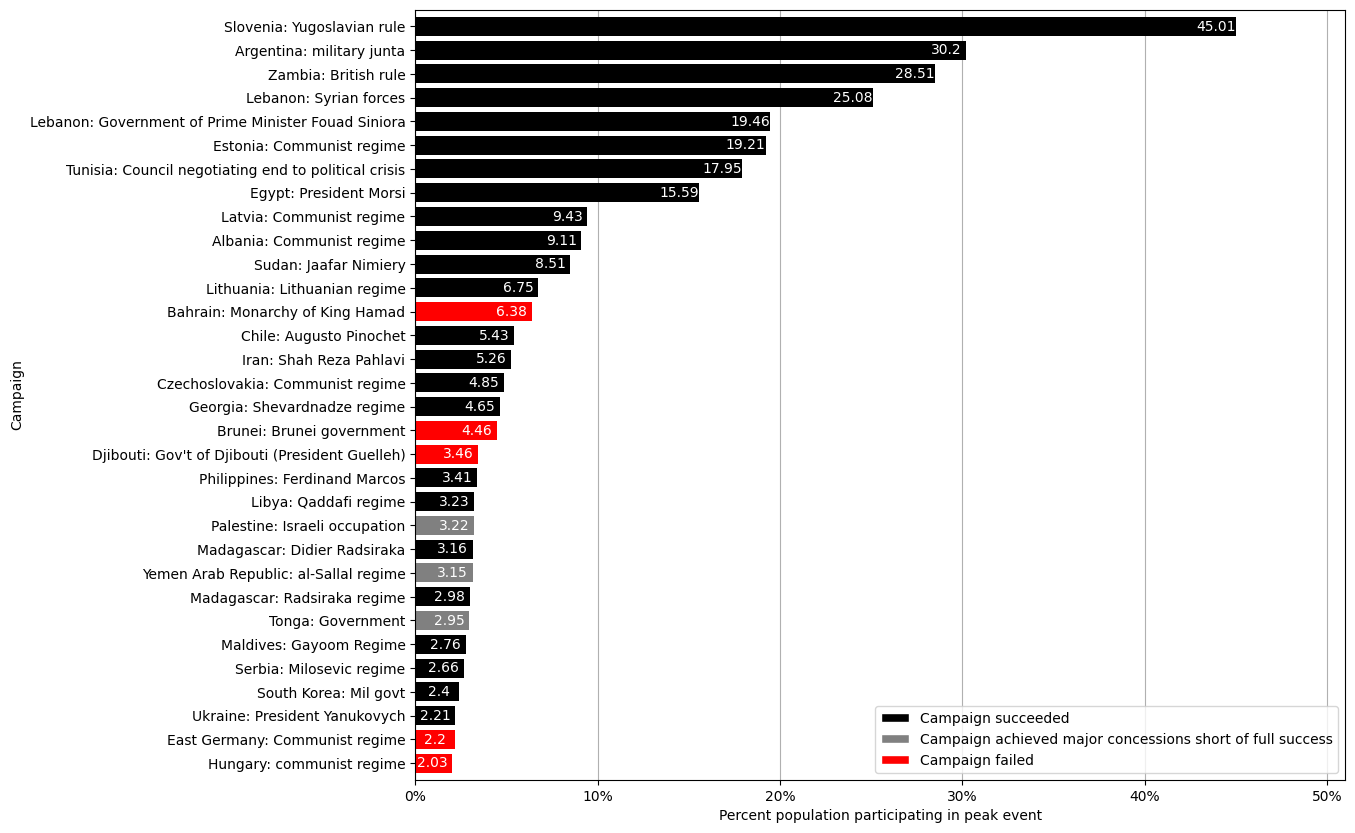

In [23]:
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

plt.style.use('default')



# Define bars colors
color_mapping = {'Campaign succeeded': 'black', 'Campaign achieved major concessions short of full success': 'grey', 'Campaign failed': 'red'}

# Map the colors based on the values in 'CAMPAIGN_RESULTS'
colors = [color_mapping[value] for value in campaigns_over_002['CAMPAIGN_RESULTS']]

# Plot the horizontal bar chart
plt.figure(figsize=(12, 10))




# Adding grid lines only for the x-axis
plt.grid(axis='x',zorder=1)

# Plotting horizontal bars
bars = plt.barh(campaigns_over_002['DESCRIPTION'], campaigns_over_002['PERCENTAGE POPULAR PARTICIPATION'], color=colors,zorder=2)

#create the text to be inserted in the bars
text_bars=round(campaigns_over_002['PERCENTAGE POPULAR PARTICIPATION']*100,2)

# Adding text labels within each bar
for bar, label in zip(bars, text_bars):
    plt.text(bar.get_width()-0.011 , bar.get_y() + bar.get_height()/2 , label, ha='center', va='center', color='white', fontsize=10)


# Set the y-axis limit to start at the beginning of the first bar
plt.ylim(min(bars[0].get_y(), bars[-1].get_y())-0.3, max(bars[0].get_y() + bars[0].get_height(), bars[-1].get_y() + bars[-1].get_height())+0.3)
plt.xlim(0,0.51)


# Format x-axis labels as percentages
def percent_formatter(x, pos):
    return f'{x:.0%}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(percent_formatter))




# Legend
legend_elements = [Patch(facecolor=color, edgecolor='w', label=label) for label, color in color_mapping.items()]
plt.legend(handles=legend_elements)

plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')

plt.show()


From the graph above we can see that the campaigns with higher participation rates are more successful than the others, but it doesn't always happen.
There are campaigns like Monarchy of King Hamad in Bahrain with a high percentage of participation (6.38%), which were not successful in the end.

In [24]:
#Investigation for Greece
df[df['LOCATION']=='Greece']

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,EYEAR_DECADE,CAMPAIGN_RESULTS,DESCRIPTION
119,401,Greek Civil War,Greece,1946,1949,British and US occupation,0,0,1,0,0,1,0,1,0,0,1778,40000.0,0.005092,1,0,NaN,0.0,1,1,1940,Campaign failed,Greece: British and US occupation
120,89,Greek anti-military,Greece,1973,1974,Military rule,1,0,0,0,1,0,1,0,0,0,654,2500.0,0.000279,1,1,1.0,0.0,1,0,1970,Campaign succeeded,Greece: Military rule


Regarding Greece, there are 2 campaigns in the dataset.The first is the Greek Civil War (1946-1949) and the second one is the Greek anti-military
(1973-1974).Although the percentage of participation in the first campaign(0.5%) is higher than in the second one (0.02%), the first campaign failed while the second was succesfull. We also observe that the first was violent while the second one was not. So we conclude that we may need to take and other factors into account if we want to investigate whether a campaign will be successful or not.

# 3. The Effect of Participation on the Probability of Campaign Success

I will examine the effect of participation on the probability of campaign success. First, I need to drop all rows where the participation is null. Afterwards,I will calculate the population because we know the people who participated in the campaign and the percentage of these people compared to the total population of the country.

In [25]:

df = df.dropna(subset=['PARTICIPATION'])

In [26]:
#Create new column with the population of each country

df['POPULATION']=df['PARTICIPATION']/df['PERCENTAGE POPULAR PARTICIPATION']

In the NAVCO 1.1 documentation,the Membership per capita is defined as the logarithm of Members that participated in the campaign per the respective logarithm of population of the country.So first, I wll calculate this field.

In [27]:
df['LOG_POPULATION']=np.log(df['POPULATION'])
df['LOG_PARTICIPATION']=np.log(df['PARTICIPATION'])
df['MEMBERSHIP_PER_CAPITA'] = df['LOG_PARTICIPATION']/df['LOG_POPULATION']

The results of the logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends, are shown below

## Logistic Regression with 2 independent variables

In [28]:
from statsmodels.formula.api import logit

# for 2 dependent variables
participation_logit_2_mod = logit("SUCCESS ~ MEMBERSHIP_PER_CAPITA + LOG_POPULATION", data=df)
participation_logit_2_res = participation_logit_2_mod.fit()

participation_logit_2_res.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Method:            MLE       
Dependent Variable:  SUCCESS           Pseudo R-squared:  0.130     
Date:                2023-12-05 22:56  AIC:               447.3747  
No. Observations:    380               BIC:               459.1952  
Df Model:            2                 Log-Likelihood:    -220.69   
Df Residuals:        377               LL-Null:           -253.58   
Converged:           1.0000            LLR p-value:       5.1893e-15
No. Iterations:      6.0000            Scale:             1.0000    
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
Intercept             -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
MEMBERSHIP_PER_CAPITA  7.6475   1.1664  6.5563 0.0000  5.3613 9.9336
LOG_POPULATION        -0.1388   0.0736 -1.8871 0.0591 -0.2830 0.0054
====================================================================

"""

The logistic regression analysis shows that the variable membership per capita is a statistically significant predictor of campaign success. 
With a coefficient of 7.6475 and a p-value=0, we understand that this variable is associated with a significant increase in the log-odds of success.
On the other hand, the variable that is connected to the logarithm of population has p-value=0.059 and indicates that the variable LOG_POPULATION is not statistically significant in predicting campaign success. So, we understand that the most important variable of the model is the membership per capita.

I will create a new table with the predictions of the model, in order to create the plot.

In [29]:
success_predicted_2 = participation_logit_2_res.predict(df[['MEMBERSHIP_PER_CAPITA','LOG_POPULATION']])

Below is the scatter plot showing the logged participants per capita, on the  x  axis, and the probability of success on the y axis, for this model.

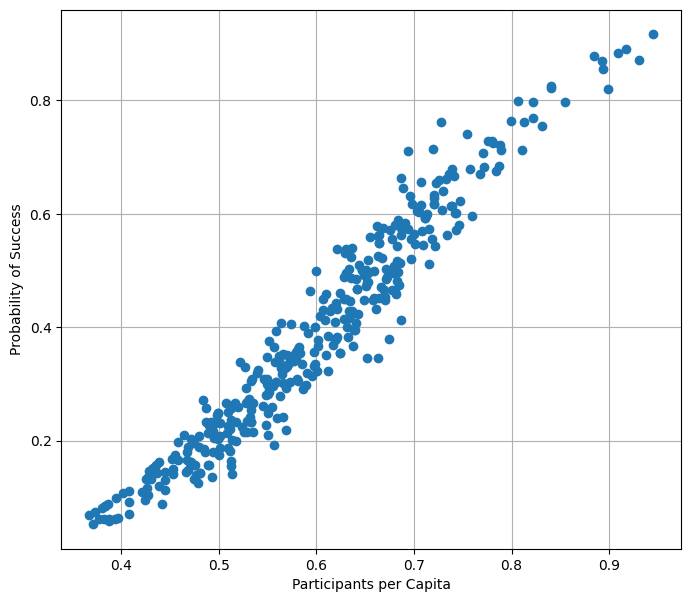

In [30]:
plt.figure(figsize=(8, 7))

plt.grid(zorder=1)

plt.scatter(df['MEMBERSHIP_PER_CAPITA'], success_predicted_2,zorder=2)
plt.xlabel('Participants per Capita')
plt.ylabel('Probability of Success')
plt.show()


From this graph, there seems to be a tendency for the probability of success to increase as the membership per capita increases.Nevertheless, we observe deviations between the probabilities for certain values of participants per capita, and we cannot end up in an accurate conclusion about the success, given a certain value of the independent variable.

## Logistic Regression with 1 independent variable

We are going to run now a logistic regression but with only the membership per capita as independent variable.

In [31]:
participation_logit_1_mod = logit("SUCCESS ~ MEMBERSHIP_PER_CAPITA", data=df)
participation_logit_1_res = participation_logit_1_mod.fit()

participation_logit_1_res.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   SUCCESS           Pseudo R-squared:  0.123     
Date:                 2023-12-05 22:56  AIC:               449.0222  
No. Observations:     380               BIC:               456.9026  
Df Model:             1                 Log-Likelihood:    -222.51   
Df Residuals:         378               LL-Null:           -253.58   
Converged:            1.0000            LLR p-value:       3.2041e-15
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             -5.3469   0.7095 -7.5362 0.0000 -6.7375 -3.9563
MEMBERSHIP_PER_CAPITA  8.0495   1.1414  7.0524 0.0000  5.8125 10.2866
=====================================================================

"""

In [32]:
success_predicted_1 = participation_logit_1_res.predict(df['MEMBERSHIP_PER_CAPITA'])

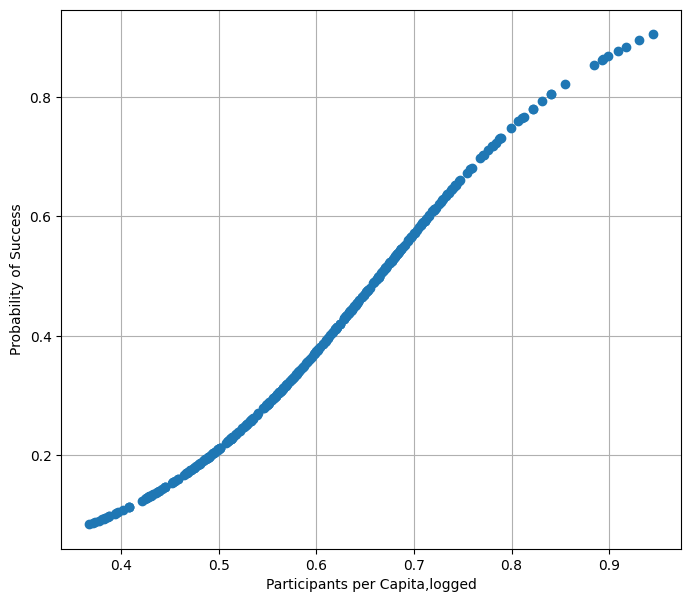

In [33]:
plt.figure(figsize=(8, 7))

plt.grid(zorder=1)

# Create a scatter plot
plt.scatter(df['MEMBERSHIP_PER_CAPITA'], success_predicted_1,zorder=2)
plt.xlabel('Participants per Capita,logged')
plt.ylabel('Probability of Success')
plt.show()


The graph converges to a continuous line, and the reason is that the model takes into account only the significant variable and not the other one, which is not so significant. Now we can say that each value of membership per capita corresponds to a certain probability of success, without all the deviations of the previous graph.

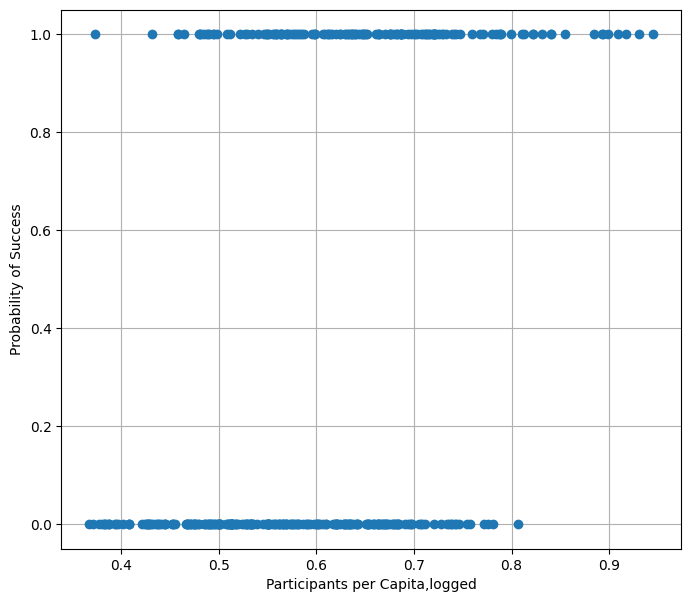

In [34]:
plt.figure(figsize=(8, 7))

plt.grid(zorder=1)

# Create a scatter plot
plt.scatter(df['MEMBERSHIP_PER_CAPITA'], df['SUCCESS'],zorder=2)
plt.xlabel('Participants per Capita,logged')
plt.ylabel('Probability of Success')
plt.show()


# 4. The Level of Participation Tipping Point

## Question 1

I create a function to match the percentage of population to categories. Then I create a new column

In [35]:
def participation_bucket(x):
    if x<0.000035:
       return 'less than 0.0035%'
    elif x<0.00015:
        return '0.0035% - 0.015%'
    elif x<0.0006:
        return '0.015% - 0.06%'
    elif x<0.0025:   
        return '0.06% - 0.25%'
    elif x<0.01:
        return '0.25% - 1.0%'
    elif x<0.035:
        return '1.0% - 3.5%'
    else: return  'greater than 3.5%'  

In [36]:
df['PARTICIPATION_BUCKET']=df['PERCENTAGE POPULAR PARTICIPATION'].apply(participation_bucket)

I group all the categories of this new column and I find the number of the capmaigns in each category and the respective number of the successful  campaigns. Having calculated these values, I also calculate the percentage.

In [37]:
grouped_data=df.groupby('PARTICIPATION_BUCKET')['SUCCESS'].agg(['sum', 'count']).reset_index()

In [38]:
grouped_data['success_rate']=grouped_data['sum']/grouped_data['count']

In [39]:
grouped_data.sort_values(by='success_rate', ascending=False,inplace=True)

In [40]:
grouped_data['success_rate']=round(grouped_data['success_rate']*100,2).apply(str) + '%'

In [41]:
#rename the columns and align them
final_grouped=pd.DataFrame(data=grouped_data[['PARTICIPATION_BUCKET','count','success_rate']])
final_grouped.rename(columns={'PARTICIPATION_BUCKET':'Peak Popular Participation (%)','count':'Observations','success_rate':'Success Rate'},inplace=True)
final_grouped.style.set_properties(**{'text-align': 'left'},inplace=True)

,Peak Popular Participation (%),Observations,Success Rate
5,greater than 3.5%,18,88.89%
4,1.0% - 3.5%,41,60.98%
3,0.25% - 1.0%,92,45.65%
2,0.06% - 0.25%,95,45.26%
1,0.015% - 0.06%,66,24.24%
0,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


## Question 2

We found in exercise 3 the parameters of the model. The parameters, log-odds of this model and the graph of the regression are the following

In [42]:
participation_logit_1_res.params

Intercept               -5.346891
MEMBERSHIP_PER_CAPITA    8.049520
dtype: float64

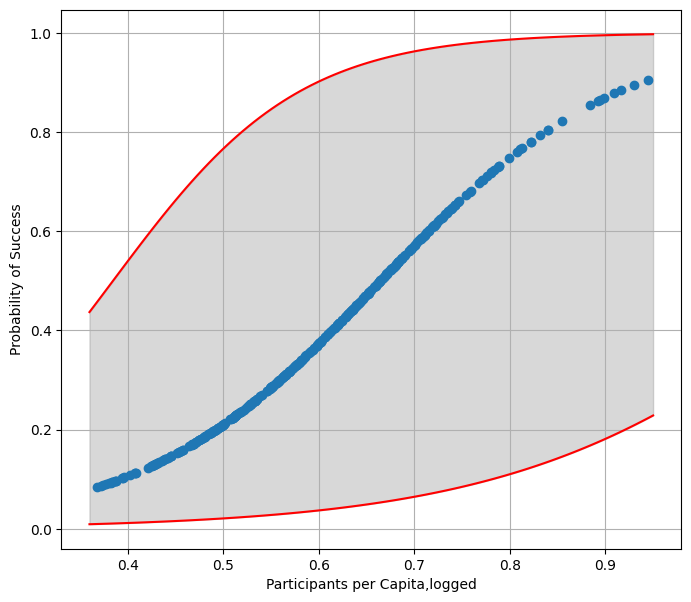

In [43]:
plt.figure(figsize=(8, 7))

plt.grid(zorder=1)

#Create the Confidence Interval
x = np.linspace(0.36, 0.95,100)
y0975 = 1 / (1 + np.exp(-(-3.9563 + 10.2866*x)))
y0025 = 1 / (1 + np.exp(-(-6.7375 + 5.8125*x)))
plt.fill_between(x, y0975, y0025, color='gray', alpha=0.3, label='Fill between')


# Create a scatter plot

#Plot for Confidence Interval and uncertainty 0.5
plt.plot(x,y0975,color='red') 
plt.plot(x,y0025,color='red')

plt.scatter(df['MEMBERSHIP_PER_CAPITA'], success_predicted_1,zorder=2)
plt.xlabel('Participants per Capita,logged')
plt.ylabel('Probability of Success')
plt.show()

We can see from the data that there is no per capita membership that satisfies the requirement for success in a campaign with 99% probability.
On the other hand, we should remember that the model is an approximation. We therefore construct the limits of the confidence interval with an uncertainty of 0.05. The upper limit of the interval reaches a point where the probability of success is 0.99.

The function for the upper limit is described by 

$$ y = -3.9563 + 10.2866 x,\quad y = \ln\frac{p(x)}{1 - p(x)} $$

By setting p(x)=0.99 we can find the membership per capita for success in a campaign with 99% probability

In [44]:
mpcap=(np.log(0.99/(1-0.99))+3.9563)/10.2866
mpcap

0.8313164554016478

Having found the required memebership per capita, we try to understand from the dataset what is the corresponding percentage of population.

In [45]:
df[df['MEMBERSHIP_PER_CAPITA']<=mpcap].sort_values(by='MEMBERSHIP_PER_CAPITA',ascending=False)[['CAMPAIGN','MEMBERSHIP_PER_CAPITA','PERCENTAGE POPULAR PARTICIPATION','SUCCESS']].head()

,CAMPAIGN,MEMBERSHIP_PER_CAPITA,PERCENTAGE POPULAR PARTICIPATION,SUCCESS
158,Iranian Revolution,0.831294,0.052632,1
63,anti-Pinochet campaign,0.822027,0.054264,1
201,pro-democracy movement/Sajudis,0.821769,0.067492,1
80,Velvet Revolution,0.812648,0.048544,1
266,People Power,0.811163,0.034130,1


Acording to observations, we end up that the tipping point for success in a campaign with 99% probability is approximately 5% of the population.

# 5. Nonviolent Resistance and Target Regime Type

We are going to use the dataset "p5v2018" in order to fetch information about the regime type. The common fields in 2 datasets are the country and the end date. The target is to bring in the first dataset the polity for every country at the end year of the campaign.Polity scale ranges from +10 (strongly democratic) to -10 (strongly autocratic). There are also some codes like (-66,-77,-88) that refer to Interruption Periods,Interregnum Periods and Transition Periods respectively and that we are going to remove them from the dataset

In [46]:
df_new=pd.merge(df,polity_df,left_on=['LOCATION','EYEAR'],right_on=['country','year'],how='inner')

In [47]:
#Remove -66, -77,-88

df_new = df_new[~df_new['polity'].isin([-66, -77, -88])]

We run the logistic regression of success on the nonviolence indicator controlling for the Polity score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

In [48]:
df_new_mod = logit("SUCCESS ~ polity + LOG_PARTICIPATION + LOG_POPULATION +  NONVIOL", data=df_new)
df_new_res = df_new_mod.fit()

df_new_res.summary()

Optimization terminated successfully.
         Current function value: 0.505782
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  246
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.2244
Time:                        22:56:20   Log-Likelihood:                -124.42
converged:                       True   LL-Null:                       -160.42
Covariance Type:            nonrobust   LLR p-value:                 8.637e-15
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5374      1.653      0.930      0.352      -1.703       4.778
polity                0.0516      0.026      1.958      0.050   -5.14e-05       0.103
LOG_PARTICIPATION     0.3935      0.101      3.880      0.000       0.195       0.592
LOG_POPULATION       -0.4000      0.108     -3.718      0.000      -0.611      -0.189
NONVIOL               1.1191      0.347      3.226      0.001       0.439       1.799
=====================================================================================
"""

The p-value=0.001 for the variable NONVIOL which is related with non violent campaigns, is below the commonly used significance level of 0.05. Therefore, we can say that the coefficient for NONVIOL is statistically significant and has a significant impact on the model even if we control for the regime type.